In [ ]:
# demonstrate kmeans in a simple example
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

# check out the video (7min) on this page:
# https://databricks.com/tensorflow/clustering-and-k-means

import numpy
import pandas
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

[0.83685684 2.13635938] [-1.4136581   7.40962324]


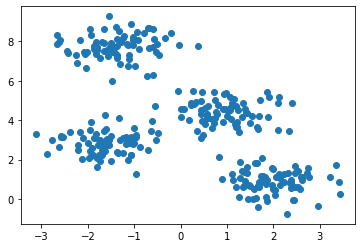

In [ ]:
#make some blobs of data
x, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
#the data a series of arrays of two points
print(x[0], x[1])

#show all those points
plt.scatter(x[:,0], x[:,1])
plt.show()

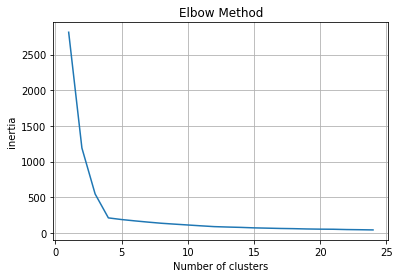

In [ ]:
# how many clusters are there?  (here you can see them, but often you can not..)
# use the elbow method

max_clusters = 25
inertia = []

for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, max_clusters), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.grid()
plt.show()

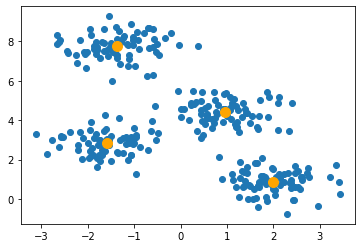

In [ ]:
# perform the kmeans algorithm with 4 culsters using k-means++ approach during 300 iterations

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)

plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='orange')
plt.show()

In [ ]:
# You can also find the elbow analytically
max_clusters = 25
print(inertia)

In [ ]:
# start with some big difference..
difference = 10000

# loop through all the differences to find the smallest difference
for index in range (1, len(inertia) -1):
  current_difference = abs(inertia[index] - inertia[index-1])
  print('this is the current difference and the index: ', current_difference, index)
  if(current_difference < difference):
    difference = current_difference
    best_cluster = index + 1

print('Here is the minimum difference: ', difference)
elbow = max_clusters - best_cluster
print('Here is correspnding elbow / cluster number: ', elbow)
  

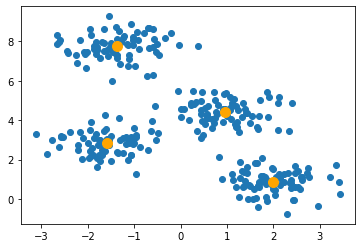

In [ ]:
# perform the kmeans algorithm with the elbow number found above

kmeans = KMeans(n_clusters=elbow, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)

plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='orange')
plt.show()

In [ ]:
# much more detail
# https://benalexkeen.com/k-means-clustering-in-python/
# https://realpython.com/k-means-clustering-python/